# Results of TSD, DANN, SCADANN models across 10 days of inward rotation starting at Day_0~6 for Subject_4

Library used can be downloaded from https://github.com/aonai/long_term_EMG_myo   
&emsp; Original by UlysseCoteAllard https://github.com/UlysseCoteAllard/LongTermEMG   
Dataset recorded by https://github.com/Suguru55/Wearable_Sensor_Long-term_sEMG_Dataset   
Extended robot project can be found in https://github.com/aonai/myo_robot_arm

### Notes
* weights for TSD are total of 50 training models, 10 for each day
* weights for DANN and SCADANN are total of 45 trianing models, 9 for each day


* training examples should have shape (1, 4,)
* first session has shape (28, 572, 252)
* the following sessions have shape (4, 572, 252)
* training labels should have shape (1, 4,)


* location 0, 1, and 2 corresponds to neutral position, inward rotation, and outward rotation respectively
* session mentioned below are days, so number of sessions is 10



In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd 

In [2]:
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
os.chdir(code_dir)
from PrepareAndLoadData.process_data import read_data_training

# 0. Prepare Data
use `switch=2` to train across days and individually on wearing location 0 (`session_in_include=[0]`)

### specify the directories used for running the code:
* `code_diar`: path to long_term_EMG_myo library
* `data_dir`: where raw dataset is loaded; raw data is in csv format
* `processed_data_dir`: where processed dataset is loaded; processed data is in npy pickle format
    * processed data should be a ndarray of shape   
    (controlling_factor_1 x controlling_factor_2 x num_sessions_per_gesture x #examples_window*#mov(26*22=572) x processed_channel_shape(252 for TSD, (4,8,10) for ConvNet)
* `path_<model_name>`: where model weights are saved
    * weights should be saved in folder `/Weights/<model_name>`. Each folder has subfolders containing weights for the first controlling factor.
    * weights for base model (TSD or ConvNet) contain m set of training model
    * weights for DANN and SCADANN contain m-1 set of trianing model (these models are trianed based on TSD, so they do not have a best_state_0.pt model). 
* `save_<model_name>`: where model results are saved
    * each result for testing a model on a group of dataset is saved in folder `results`. Each result has corresponding 
        * `<model_name>.txt` includes predictions, ground truths, array of accuracies for each participant and each session, and overall accuracy
        * `predictions_<model_name>.npy` includes array of accuracies, ground truths, predictions, and model outputs (probability array for each prediction)
        * remember to make blank files in these names before saving



* use `read_data_training` to process raw dataset
        

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_all_across_day_loc_1_lump7"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

path_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump7/TSD"
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump7/DANN"
save_DANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump7/SCADANN"
save_SCADANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

In [4]:
read_data_training(path=data_dir, store_path = processed_data_dir,  
                   sessions_to_include =[1], switch=2, include_in_first=7,
                   start_at_participant=5, num_participant=1)

Loading and preparing Training datasets...
session  1  --- process data in days  [2, 5, 6, 16, 17, 18, 22, 24, 25, 28]
index_participant_list  [5]
READ  Sub 5 _Loc 1 _Day 2
examples_per_session =  (1, 4, 572, 252)
READ  Sub 5 _Loc 1 _Day 5
Include day  5  in first dataset  (4, 572, 252)
examples of first session =  (8, 572, 252)
examples_per_session =  (1, 8, 572, 252)
READ  Sub 5 _Loc 1 _Day 6
Include day  6  in first dataset  (8, 572, 252)
examples of first session =  (12, 572, 252)
examples_per_session =  (1, 12, 572, 252)
READ  Sub 5 _Loc 1 _Day 16
Include day  16  in first dataset  (12, 572, 252)
examples of first session =  (16, 572, 252)
examples_per_session =  (1, 16, 572, 252)
READ  Sub 5 _Loc 1 _Day 17
Include day  17  in first dataset  (16, 572, 252)
examples of first session =  (20, 572, 252)
examples_per_session =  (1, 20, 572, 252)
READ  Sub 5 _Loc 1 _Day 18
Include day  18  in first dataset  (20, 572, 252)
examples of first session =  (24, 572, 252)
examples_per_session 

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


examples_per_session =  (2,)
READ  Sub 5 _Loc 1 _Day 25
examples_per_session =  (3,)
READ  Sub 5 _Loc 1 _Day 28
examples_per_session =  (4,)
@ traning sessions =  (1, 4)
traning examples  (1, 4)
traning labels  (1, 4)
all traning examples  (1, 4)
all traning labels  (1, 4)


In [5]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 4)
traning labels  (1, 4)


In [6]:
for idx, examples_per_session in enumerate (examples_datasets_train[0]):
    print(idx, " examples_per_session = ", np.shape(examples_per_session))
    print(idx, " labels_per_session = ", np.shape(labels_datasets_train[0][idx]))

0  examples_per_session =  (28, 572, 252)
0  labels_per_session =  (28, 572)
1  examples_per_session =  (4, 572, 252)
1  labels_per_session =  (4, 572)
2  examples_per_session =  (4, 572, 252)
2  labels_per_session =  (4, 572)
3  examples_per_session =  (4, 572, 252)
3  labels_per_session =  (4, 572)


### Specify params used for training and testing

During training and testing, processed datasets are first put into pytorch dataloders, then feed to the model trainer; following are params for TSD model and dataloaders

* `num_kernels`: list of integers defining number of neurons used in each linear layer (linear block has `dropout`=0.5)
* `number_of_cycles_total`: number of trails performed for each session (assuming that all session have the same trail size)
    * 4 for myo across day training
* `number_of_classes`: total number of gestures performed in dataset
    * 22 for myo
* `batch_size`: number of examples stored in each batch
* `feature_vector_input_length`: length of input array or each processed signal; i.e. size of one training example 
    * 252 for TSD
* `learning_rate`= 0.002515
    

In [7]:
num_kernels=[200, 200, 200]                                
number_of_cycle_for_first_training = np.shape(examples_datasets_train[0][0])[0]               
number_of_cycles_total=np.shape(examples_datasets_train[-1][-1])[0]               
print("number_of_cycle_for_first_training ", number_of_cycle_for_first_training)
print("number_of_cycles_total ", number_of_cycles_total)
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     
learning_rate=0.002515

number_of_cycle_for_first_training  28
number_of_cycles_total  4


# 1. TSD_DNN
* `train_fine_tuning`: used to train data using a base model (TSD or ConvNet)
    * running this function will save num_sessions sets of TSD model weights (each is fine tuned based on the previous training)  
    
* `test_standard_model_on_training_sessions`: test model result


### check if dataloaders are loaded correctly:
* each participant has shape (num_session x 40 x 572 x 252)
* each session has shape (40 x 572 x 252)
* put these data into on group ends up with shape (40*572=22880, 252)
    * shuffle on group of data and put into dataloaders
    * each participant should have num_sessions sets of dataloaders, each correspond to one session
   

In [8]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_standard_model_on_training_sessions, train_fine_tuning

In [9]:
train_fine_tuning(examples_datasets_train, labels_datasets_train,
                  num_kernels=num_kernels, path_weight_to_save_to=path_TSD,
                  number_of_classes=number_of_classes, 
                  number_of_cycles_total=number_of_cycles_total,
                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                  batch_size=batch_size,
                  feature_vector_input_length=feature_vector_input_length,
                  learning_rate=learning_rate)

GET one participant_examples  (4,)
   GET one training_index_examples  (28, 572, 252)  at  0
   GOT one group XY  (16016, 252)    (16016,)
       one group XY test  (0,)    (0,)
       one group XY train (14414, 252)    (14414,)
       one group XY valid (1602, 252)    (1602, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252

train Loss: 0.00216739 Acc: 0.89794922
val Loss: 0.00108362 Acc: 0.89519651
Epoch 5 of 500 took 0.109s
Epoch 5/499
----------
train Loss: 0.00210767 Acc: 0.89746094
val Loss: 0.00097440 Acc: 0.91266376
Epoch 6 of 500 took 0.105s
Epoch 6/499
----------
train Loss: 0.00207078 Acc: 0.90527344
val Loss: 0.00091503 Acc: 0.93449782
Epoch 7 of 500 took 0.107s
Epoch 7/499
----------
train Loss: 0.00204688 Acc: 0.90869141
val Loss: 0.00100958 Acc: 0.90393013
Epoch 8 of 500 took 0.107s
Epoch 8/499
----------
train Loss: 0.00185047 Acc: 0.91162109
val Loss: 0.00101136 Acc: 0.93449782
Epoch 9 of 500 took 0.109s
Epoch 9/499
----------
train Loss: 0.00185405 Acc: 0.91992188
val Loss: 0.00082231 Acc: 0.90829694
New best validation loss: 0.0008223055491801433
Epoch 10 of 500 took 0.108s
Epoch 10/499
----------
train Loss: 0.00172687 Acc: 0.91845703
val Loss: 0.00095957 Acc: 0.930131
Epoch 11 of 500 took 0.114s
Epoch 11/499
----------
train Loss: 0.00179355 Acc: 0.91796875
val Loss: 0.00124312 Acc: 0.8

In [10]:
algo_name = "standard_TSD"
test_standard_model_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_TSD,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_TSD, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (4,)
   GET one training_index_examples  (28, 572, 252)  at  0
   GOT one group XY  (16016, 252)    (16016,)
       one group XY test  (4004, 252)    (4004, 252)
       one group XY train (14414, 252)    (14414,)
       one group XY valid (1602, 252)    (1602, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)

In [11]:
results_filename = save_TSD + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
index_participant_list = ['0~6', 7, 8, 9]
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
TSD_df

,Participant_5
Day_0~6,0.896853
Day_7,0.800699
Day_8,0.758741
Day_9,0.769231


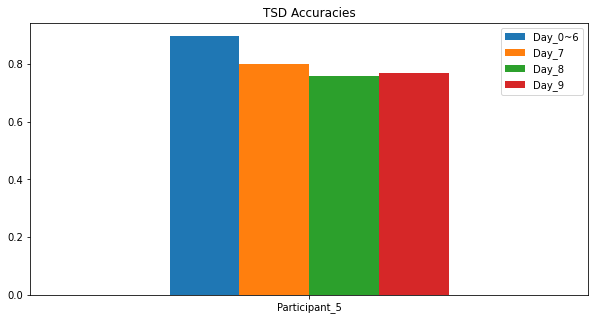

In [12]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

In [13]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [14]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Loc1_Sub"
n_name = "Day0~6->"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 4)
predictions =  (1, 4)
index_participant_list  ['0~6', 7, 8, 9]
accuracies_gestures =  (22, 4)


,Unnamed: 0,Loc1_Sub5_Day0~6->0~6,Loc1_Sub5_Day0~6->7,Loc1_Sub5_Day0~6->8,Loc1_Sub5_Day0~6->9
0,M0,1.000000,1.000000,1.000000,1.000000
1,M1,0.868132,0.423077,0.346154,0.384615
2,M2,0.884615,0.730769,0.807692,0.961538
3,M3,0.912088,0.115385,0.730769,0.076923
4,M4,0.730769,0.038462,0.153846,0.000000
5,M5,0.983516,1.000000,0.884615,0.923077
6,M6,0.950549,1.000000,0.615385,1.000000
7,M7,0.956044,1.000000,1.000000,0.961538
8,M8,0.890110,0.884615,1.000000,0.923077
9,M9,0.868132,0.923077,0.884615,0.923077


# 2. DANN
* `train_DANN`: train DANN model using the first set of training weights from base model
    * num_sessions-1 sets of training weights will be saved
* `test_DANN_on_training_sessions`: test DANN model

In [15]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [16]:
train_DANN(examples_datasets_train, labels_datasets_train, 
          num_kernels=num_kernels,
          path_weights_fine_tuning=path_TSD,
          number_of_classes=number_of_classes,
          number_of_cycles_total = number_of_cycles_total,
          number_of_cycle_for_first_training = number_of_cycle_for_first_training,
          batch_size=batch_size,
          feature_vector_input_length=feature_vector_input_length,
          path_weights_to_save_to=path_DANN, learning_rate=learning_rate)

GET one participant_examples  (4,)
   GET one training_index_examples  (28, 572, 252)  at  0
   GOT one group XY  (16016, 252)    (16016,)
       one group XY test  (0,)    (0,)
       one group XY train (14414, 252)    (14414,)
       one group XY valid (1602, 252)    (1602, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252

Accuracy source 0.851562, main loss classifier 0.287381, source classification loss 0.439080, loss domain distinction 0.180559, accuracy domain distinction 0.500000
VALIDATION Loss: 0.27691364 Acc: 0.90137328
New best validation loss:  0.2769136428833008
Epoch 7 of 500 took 0.306s
Accuracy source 0.851074, main loss classifier 0.265568, source classification loss 0.395229, loss domain distinction 0.180536, accuracy domain distinction 0.500000
VALIDATION Loss: 0.28874215 Acc: 0.89388265
Epoch 8 of 500 took 0.238s
Accuracy source 0.859375, main loss classifier 0.262038, source classification loss 0.388294, loss domain distinction 0.181121, accuracy domain distinction 0.500000
VALIDATION Loss: 0.31248415 Acc: 0.87952559
Epoch 9 of 500 took 0.238s
Accuracy source 0.856445, main loss classifier 0.265920, source classification loss 0.396349, loss domain distinction 0.181417, accuracy domain distinction 0.500000
VALIDATION Loss: 0.28264993 Acc: 0.89138577
Epoch 10 of 500 took 0.242s
Accuracy 

Accuracy source 0.833008, main loss classifier 0.312188, source classification loss 0.480630, loss domain distinction 0.188128, accuracy domain distinction 0.499756
VALIDATION Loss: 0.30941877 Acc: 0.88764045
New best validation loss:  0.30941876769065857
Epoch 4 of 500 took 0.238s
Accuracy source 0.816406, main loss classifier 0.322469, source classification loss 0.503350, loss domain distinction 0.186453, accuracy domain distinction 0.500000
VALIDATION Loss: 0.45634153 Acc: 0.84144819
Epoch 5 of 500 took 0.235s
Accuracy source 0.842773, main loss classifier 0.297012, source classification loss 0.452592, loss domain distinction 0.186524, accuracy domain distinction 0.500000
VALIDATION Loss: 0.31176162 Acc: 0.88826467
Epoch    10: reducing learning rate of group 0 to 5.0300e-04.
Epoch 6 of 500 took 0.237s
Accuracy source 0.856934, main loss classifier 0.281530, source classification loss 0.426414, loss domain distinction 0.183674, accuracy domain distinction 0.500000
VALIDATION Loss: 0

In [17]:
algo_name = "DANN"
test_DANN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                              feature_vector_input_length=feature_vector_input_length,
                              num_neurons=num_kernels, path_weights_DA=path_DANN,
                              algo_name=algo_name, save_path = save_DANN, 
                              number_of_cycles_total=number_of_cycles_total,
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              path_weights_normal=path_TSD, number_of_classes=number_of_classes,
                              cycle_for_test=3)

GET one participant_examples  (4,)
   GET one training_index_examples  (28, 572, 252)  at  0
   GOT one group XY  (16016, 252)    (16016,)
       one group XY test  (4004, 252)    (4004, 252)
       one group XY train (14414, 252)    (14414,)
       one group XY valid (1602, 252)    (1602, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)

In [18]:
results_filename = save_DANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
DANN_acc = results[0]
DANN_acc_overall = np.mean(DANN_acc)
DANN_df = pd.DataFrame(DANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
DANN_df

,Participant_5
Day_0~6,0.896853
Day_7,0.851399
Day_8,0.772727
Day_9,0.795455


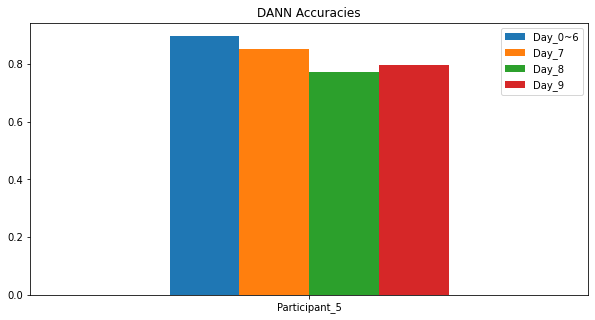

In [19]:
DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("DANN Accuracies")
plt.show()

In [20]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_DANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 4)
predictions =  (1, 4)
index_participant_list  ['0~6', 7, 8, 9]
accuracies_gestures =  (22, 4)


,Unnamed: 0,Loc1_Sub5_Day0~6->0~6,Loc1_Sub5_Day0~6->7,Loc1_Sub5_Day0~6->8,Loc1_Sub5_Day0~6->9
0,M0,1.000000,1.000000,1.000000,1.000000
1,M1,0.868132,0.692308,0.423077,0.615385
2,M2,0.884615,0.923077,0.923077,0.884615
3,M3,0.912088,0.692308,0.884615,0.307692
4,M4,0.730769,0.461538,0.423077,0.038462
5,M5,0.983516,0.807692,1.000000,0.884615
6,M6,0.950549,1.000000,0.615385,1.000000
7,M7,0.956044,1.000000,1.000000,1.000000
8,M8,0.890110,0.653846,0.807692,0.923077
9,M9,0.868132,0.884615,0.769231,0.807692


# 3. SCADANN

* `run_SCADANN_training_sessions`: train SCADANN model. The first session uses TSD model_0 wegits; others use DANN weights
    * specify `percentage_same_gesture_stable` based on the performance of most pseudo labels: 
        * print accuracies out and check what percentage will optimize `ACCURACY MODEL` and `ACCURACY PSEUDO` without cutting out too much data 
    * num_sessions-1 sets of training weights will be saved


In [21]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import \
    run_SCADANN_training_sessions, test_network_SCADANN

In [22]:
percentage_same_gesture_stable = 0.75 
run_SCADANN_training_sessions(examples_datasets=examples_datasets_train, labels_datasets=labels_datasets_train,
                              num_kernels=num_kernels, feature_vector_input_length=feature_vector_input_length,
                              path_weights_to_save_to=path_SCADANN,
                              path_weights_Adversarial_training=path_DANN,
                              path_weights_Normal_training=path_TSD,
                              number_of_cycles_total = number_of_cycles_total, 
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              number_of_classes=number_of_classes,
                              learning_rate=learning_rate)

GET one participant_examples  (4,)
   GET one training_index_examples  (28, 572, 252)  at  0
   GOT one group XY  (16016, 252)    (16016,)
       one group XY test  (0,)    (0,)
       one group XY train (16016, 252)    (16016,)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
dataloaders: 
   train  (1, 4)
   valid  (0,)
   test  (1, 0)
participants_train =  1
Optimizer =  <generator object Module.parameters at 0x7f5035ae6f90>
=> loading checkpoint '/home/laiy/gitrepos/msr_fin

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Accuracy total 0.837187, main loss classifier 0.584376, source accuracy 0.842500 source classification loss 0.460137, target accuracy 0.831875 target loss 0.493223 accuracy domain distinction 0.500000 loss domain distinction 1.076955,
VALIDATION Loss: 0.28151787 Acc: 0.89781022
New best validation loss:  0.28151786965983255
Epoch 2 of 500 took 0.376s
Accuracy total 0.850625, main loss classifier 0.543257, source accuracy 0.849375 source classification loss 0.448937, target accuracy 0.851875 target loss 0.427172 accuracy domain distinction 0.500000 loss domain distinction 1.052021,
VALIDATION Loss: 0.28477376 Acc: 0.90024331
Epoch 3 of 500 took 0.332s
Accuracy total 0.862500, main loss classifier 0.510580, source accuracy 0.862500 source classification loss 0.403111, target accuracy 0.862500 target loss 0.407934 accuracy domain distinction 0.500000 loss domain distinction 1.050573,
VALIDATION Loss: 0.34498978 Acc: 0.86618005
Epoch 4 of 500 took 0.331s
Accuracy total 0.852187, main loss 

Accuracy total 0.889062, main loss classifier 0.424719, source accuracy 0.870000 source classification loss 0.378833, target accuracy 0.908125 target loss 0.264527 accuracy domain distinction 0.500000 loss domain distinction 1.030388,
VALIDATION Loss: 0.14405385 Acc: 0.9513382
New best validation loss:  0.14405384766204016
Epoch 28 of 500 took 0.328s
Accuracy total 0.900937, main loss classifier 0.403012, source accuracy 0.876875 source classification loss 0.359949, target accuracy 0.925000 target loss 0.240251 accuracy domain distinction 0.500000 loss domain distinction 1.029122,
VALIDATION Loss: 0.21445950 Acc: 0.91970803
Epoch 29 of 500 took 0.326s
Accuracy total 0.892500, main loss classifier 0.410564, source accuracy 0.869375 source classification loss 0.360410, target accuracy 0.915625 target loss 0.255001 accuracy domain distinction 0.500000 loss domain distinction 1.028585,
VALIDATION Loss: 0.14313738 Acc: 0.95620438
New best validation loss:  0.14313738367387227
Epoch 30 of 50

BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  10
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6923076923076923   AFTER:  0.7692307692307693  len before:  26   len after:  26
BEFORE:  0.46153846153846156   AFTER:  0.46153846153846156  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.75  len before:  26   len after:  8
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  0.8076923076923077  len before:  26   len after:  26
BEFORE:  0

STARTING TRAINING
Accuracy total 0.853966, main loss classifier 0.542673, source accuracy 0.855168 source classification loss 0.427201, target accuracy 0.852764 target loss 0.431231 accuracy domain distinction 0.500000 loss domain distinction 1.134574,
VALIDATION Loss: 0.27804608 Acc: 0.90647482
New best validation loss:  0.2780460800443377
Epoch 2 of 500 took 0.523s
Accuracy total 0.851262, main loss classifier 0.535147, source accuracy 0.852764 source classification loss 0.412477, target accuracy 0.849760 target loss 0.446606 accuracy domain distinction 0.500000 loss domain distinction 1.056050,
VALIDATION Loss: 0.21288599 Acc: 0.92565947
New best validation loss:  0.21288599180323736
Epoch 3 of 500 took 0.532s
Accuracy total 0.858774, main loss classifier 0.515963, source accuracy 0.853966 source classification loss 0.412653, target accuracy 0.863582 target loss 0.411200 accuracy domain distinction 0.500000 loss domain distinction 1.040366,
VALIDATION Loss: 0.19966124 Acc: 0.9304556

BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.2692307692307692   AFTER:  0.0  len before:  26   len after:  3
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  0.7692307692307693  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.4230769230769231   AFTER:  0.8823529411764706  len before:  26   len after:  17
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.2692307692307692   AFTER:  0.0  len before:  26   len after:  5
BEFORE:  0.7692307692307693   AFTER:  0.8076923076923077  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26

Accuracy total 0.860313, main loss classifier 0.492953, source accuracy 0.872500 source classification loss 0.362652, target accuracy 0.848125 target loss 0.416514 accuracy domain distinction 0.500000 loss domain distinction 1.033701,
VALIDATION Loss: 0.25537248 Acc: 0.91807229
Epoch 7 of 500 took 0.330s
Accuracy total 0.857812, main loss classifier 0.531010, source accuracy 0.851250 source classification loss 0.462720, target accuracy 0.864375 target loss 0.392823 accuracy domain distinction 0.500000 loss domain distinction 1.032383,
VALIDATION Loss: 0.20691175 Acc: 0.92048193
New best validation loss:  0.20691174694469996
Epoch 8 of 500 took 0.331s
Accuracy total 0.864062, main loss classifier 0.491693, source accuracy 0.865000 source classification loss 0.389457, target accuracy 0.863125 target loss 0.386370 accuracy domain distinction 0.500000 loss domain distinction 1.037796,
VALIDATION Loss: 0.22215134 Acc: 0.91807229
Epoch 9 of 500 took 0.335s
Accuracy total 0.875625, main loss 

Accuracy total 0.868125, main loss classifier 0.487098, source accuracy 0.861875 source classification loss 0.414562, target accuracy 0.874375 target loss 0.354083 accuracy domain distinction 0.500000 loss domain distinction 1.027763,
VALIDATION Loss: 0.18444123 Acc: 0.93012048
Epoch 33 of 500 took 0.337s
Accuracy total 0.868437, main loss classifier 0.470649, source accuracy 0.867500 source classification loss 0.381358, target accuracy 0.869375 target loss 0.353089 accuracy domain distinction 0.500000 loss domain distinction 1.034259,
VALIDATION Loss: 0.20797724 Acc: 0.92771084
Epoch 34 of 500 took 0.332s
Accuracy total 0.870313, main loss classifier 0.470933, source accuracy 0.868125 source classification loss 0.377555, target accuracy 0.872500 target loss 0.357942 accuracy domain distinction 0.500000 loss domain distinction 1.031842,
VALIDATION Loss: 0.21481342 Acc: 0.9253012
Epoch 35 of 500 took 0.333s
Accuracy total 0.877812, main loss classifier 0.464905, source accuracy 0.868750

In [23]:
algo_name = "SCADANN"
test_network_SCADANN(examples_datasets_train=examples_datasets_train, labels_datasets_train=labels_datasets_train,
                     num_neurons=num_kernels, feature_vector_input_length=feature_vector_input_length,
                     path_weights_SCADANN =path_SCADANN, path_weights_normal=path_TSD,
                     algo_name=algo_name, cycle_test=3, number_of_cycles_total=number_of_cycles_total,
                     number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                     number_of_classes=number_of_classes, save_path = save_SCADANN)

GET one participant_examples  (4,)
   GET one training_index_examples  (28, 572, 252)  at  0
   GOT one group XY  (16016, 252)    (16016,)
       one group XY test  (4004, 252)    (4004, 252)
       one group XY train (14414, 252)    (14414,)
       one group XY valid (1602, 252)    (1602, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)

In [24]:
results_filename = save_SCADANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
SCADANN_acc = results[0]
SCADANN_acc_overall = np.mean(SCADANN_acc)
SCADANN_df = pd.DataFrame(SCADANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
SCADANN_df

,Participant_5
Day_0~6,0.896853
Day_7,0.895105
Day_8,0.77972
Day_9,0.828671


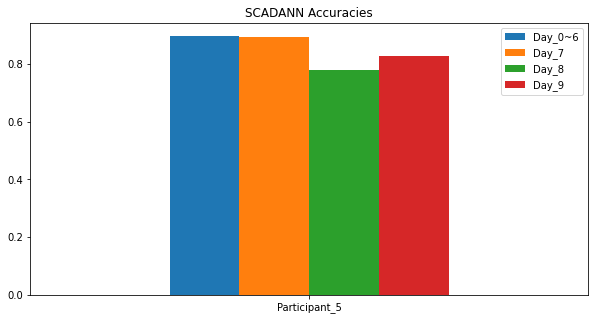

In [25]:
SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("SCADANN Accuracies")
plt.show()

In [26]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_SCADANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 4)
predictions =  (1, 4)
index_participant_list  ['0~6', 7, 8, 9]
accuracies_gestures =  (22, 4)


,Unnamed: 0,Loc1_Sub5_Day0~6->0~6,Loc1_Sub5_Day0~6->7,Loc1_Sub5_Day0~6->8,Loc1_Sub5_Day0~6->9
0,M0,1.000000,1.000000,1.000000,1.000000
1,M1,0.868132,0.692308,0.423077,0.692308
2,M2,0.884615,1.000000,1.000000,0.961538
3,M3,0.912088,0.884615,0.923077,0.192308
4,M4,0.730769,0.461538,0.384615,0.000000
5,M5,0.983516,0.961538,0.961538,0.961538
6,M6,0.950549,1.000000,0.769231,1.000000
7,M7,0.956044,1.000000,1.000000,1.000000
8,M8,0.890110,0.615385,0.692308,0.923077
9,M9,0.868132,0.961538,0.692308,0.884615


# Conclusion
Suppose there is a ndarray of NxM dataloaders, then N group of models will be trained, and each group will have M model. Each group is independent of the other, and each model within a group is dependent on its previous training weights.

In general, overall accuracies of SCADANN are better than DANN, and DANN is better than TSD.
Occasionally accuracies of SCADANN end up a little smaller than DANN, reasons may be lack of datasets put into training model (fixed) and non-optimal percentage_same_gesture_sable (fixed). Code should be reproducible if processed dataset sticks to the shape defined above.  

The amount of increase in accuracies from DANN to SCADANN looks random. But if the base model is better at classifying one session, then its corresponding SCADANN is also better at classifying the same session. Given such result, to obtain the best performance from SCADANN, a good model trained with good data should be the starting point.

* What to check if sth goes wrong:
    * percentage_same_gesture_sable
    * number of cycles or sessions
    * shape of dataloaders (combination of train, test, valid should include all dataset)
    * shape of procssed datasets
    * directory paths of weights and results
    * if weights are stored or loaded correcltyTSD_acc_overall_one = np.mean(TSD_acc, axis=0)

In [27]:
print("TSD")
display(TSD_df)
print("DANN")
display(DANN_df)
print("SCADANN")
display(SCADANN_df)

TSD


,Participant_5
Day_0~6,0.896853
Day_7,0.800699
Day_8,0.758741
Day_9,0.769231


DANN


,Participant_5
Day_0~6,0.896853
Day_7,0.851399
Day_8,0.772727
Day_9,0.795455


SCADANN


,Participant_5
Day_0~6,0.896853
Day_7,0.895105
Day_8,0.77972
Day_9,0.828671


In [28]:
diff_df = SCADANN_df-TSD_df
diff_df = diff_df.drop('Day_'+index_participant_list[0])
display(diff_df)
diff_df.to_csv(save_TSD+'/diff_results/across_day_loc1_lump7_diff.csv')

,Participant_5
Day_7,0.094406
Day_8,0.020979
Day_9,0.059441


In [29]:
overall_acc_df = pd.DataFrame([TSD_acc_overall, DANN_acc_overall, SCADANN_acc_overall],
                             index = ["TSD", "DANN", "SCADANN"],
                             columns = ["Overall_Acc"])
overall_acc_df

,Overall_Acc
TSD,0.806381
DANN,0.829108
SCADANN,0.850087


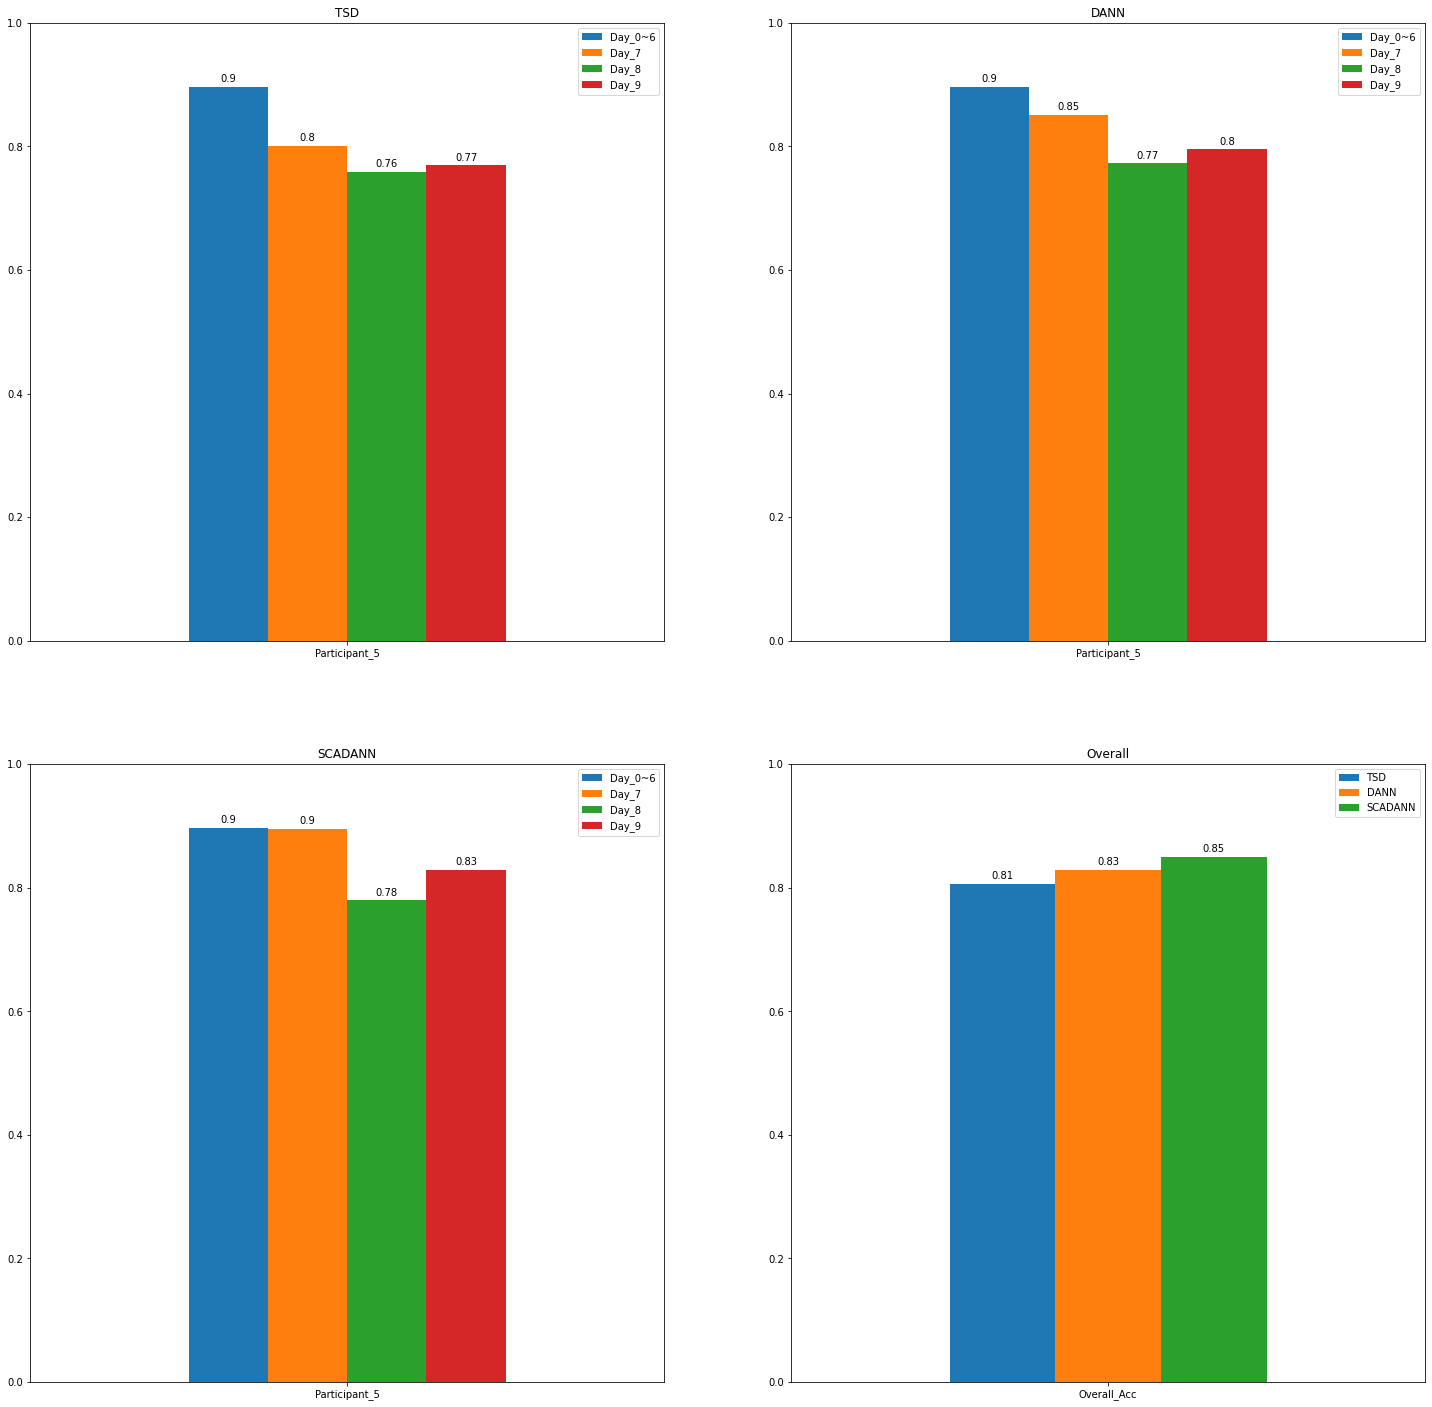

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
acc_list = [TSD_df, DANN_df, SCADANN_df, overall_acc_df]
title_list = ["TSD", "DANN", "SCADANN", "Overall"]
for idx, ax in enumerate(axes.reshape(-1)): 
    acc_list[idx].transpose().plot.bar(ax = ax, rot=0)
    ax.set_title(title_list[idx])
    ax.set_ylim([0, 1.0])
    for p in ax.patches:
        ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8),textcoords='offset points')
